## 3. Simulate 3D topographic residual phase from existing demErr.h5 file ##

In [1]:
%matplotlib inline
import os
import numpy as np
from mintpy.objects import timeseries, sensor
from mintpy.utils import readfile, writefile
from mintpy.simulation import simulation as sim
from mintpy.defaults.plot import *
from mintpy import view

work_dir = os.path.expanduser('~/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

# reference timeseries file for temp/perp baselines
proj_dir = os.path.expanduser('~/insarlab/Galapagos/AlcedoSenDT128/mintpy')
ts_file      = os.path.join(proj_dir, 'timeseries.h5')
geom_file    = os.path.join(proj_dir, 'inputs/geometryRadar.h5')
dem_err_file = os.path.join(proj_dir, 'demErr.h5')
sensorName = sensor.project_name2sensor_name(ts_file)[0]

ts_obj = timeseries(ts_file)
ts_obj.open()
pbase = np.array(ts_obj.pbase)
pbase -= pbase[0]
num_date = ts_obj.numDate
length = ts_obj.length
width = ts_obj.width

Go to directory: /Users/yunjunz/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order
open timeseries file: timeseries.h5


In [2]:
## 3D topographic residual
out_file = 'sim_topoResid.h5'
if not os.path.isfile(out_file):
    # read geometry
    inc_angle = readfile.read(geom_file, datasetName='incidenceAngle')[0]
    rg_dist   = readfile.read(geom_file, datasetName='slantRangeDistance')[0]
    pbase *= 10. # amplify the noise
    # calculate topo resid
    dem_err = readfile.read(dem_err_file)[0]
    ts_data = np.zeros((num_date, length, width), np.float32)
    for i in range(num_date):
        ts_data[i,:,:] = dem_err * pbase[i] / (rg_dist * np.sin(inc_angle * np.pi / 180.))
    # write to file
    writefile.write(ts_data, out_file=out_file, ref_file=ts_file, compression='lzf')
    print('write simulated topographic residual time-series to file', out_file)
print('Done.')

create timeseries HDF5 file: sim_topoResid.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=lzf
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp      of float32    in size of (98,)
finished writing to sim_topoResid.h5
write simulated topographic residual time-series to file sim_topoResid.h5
Done.


run view.py in MintPy release version v1.1.2-93, release date 2019-07-23
input file is timeseries file: /Users/yunjunz/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order/sim_topoResid.h5 in float32 format
file size in y/x: (646, 729)
num of datasets in file sim_topoResid.h5: 98
datasets to exclude (0):
[]
datasets to display (98):
['timeseries-20141213', 'timeseries-20141225', 'timeseries-20150307', 'timeseries-20150319', 'timeseries-20150331', 'timeseries-20150412', 'timeseries-20150424', 'timeseries-20150506', 'timeseries-20150518', 'timeseries-20150530', 'timeseries-20150611', 'timeseries-20150623', 'timeseries-20150717', 'timeseries-20150729', 'timeseries-20150822', 'timeseries-20150903', 'timeseries-20150915', 'timeseries-20150927', 'timeseries-20151009', 'timeseries-20151021', 'timeseries-20151102', 'timeseries-20151114', 'timeseries-20151126', 'timeseries-20151208', 'timeseries-20151220', 'timeseries-20160101', 'timeseries-20160113', 'timeseries-20160125', 'timeseries-2

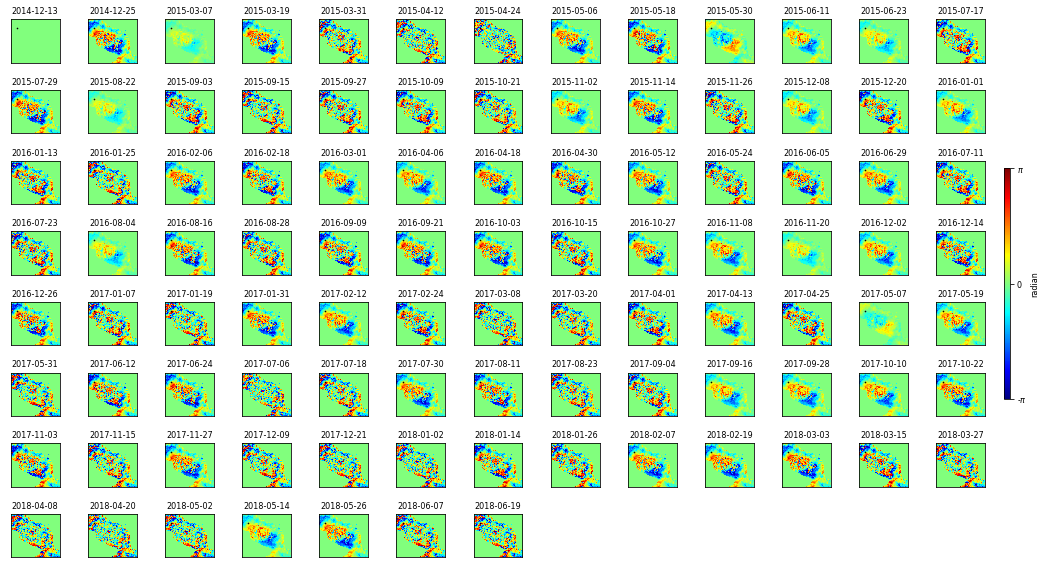

In [3]:
from mintpy import view
scp_args = ' {} --wrap '.format(out_file)
view.main(scp_args.split())